# Copyright

<PRE>
This notebook was created as part of the "Deep learning / VITMMA19" class at
Budapest University of Technology and Economics, Hungary,
https://portal.vik.bme.hu/kepzes/targyak/VITMMA19
Based on the official documentation:
https://pytorch.org/tutorials/beginner/basics/intro.html
and
https://towardsdatascience.com/from-pytorch-to-pytorch-lightning-a-gentle-introduction-b371b7caaf09

Any re-use or publication of any part of the notebook is only allowed with the
 written consent of the authors.

2023 (c) Tamás Gábor Csapó (csapot kukac tmit pont bme pont hu)
</PRE>

in the following, we will learn about
- PyTorch tensors
- Datasets
- Dataset transforms


In [ ]:
import torch
import numpy as np

In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
# torch: tensors
# Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators.

In [ ]:
# from list
a = [[0,2], [4,6]]
t_a = torch.tensor(a)
t_a

tensor([[0, 2],
        [4, 6]])

In [ ]:
# from numpy array
b = np.array(a)
t_b = torch.from_numpy(b)
t_b

tensor([[0, 2],
        [4, 6]])

In [ ]:
# from another tensor, keeping the same size / structure
x_ones = torch.ones_like(t_a)
x_ones

tensor([[1, 1],
        [1, 1]])

In [ ]:
# from another tensor, keeping the same size / structure
x_random = torch.rand_like(t_a)
x_random

RuntimeError: ignored

In [ ]:
# from another tensor, keeping the same size / structure
# we'll need to add the type
x_random = torch.rand_like(t_a, dtype=float)
x_random

tensor([[0.9544, 0.7717],
        [0.5990, 0.0530]], dtype=torch.float64)

In [ ]:
# from another tensor, keeping the same size / structure
# we'll need to add the type
# OR like this
x_random = torch.rand_like(t_a, dtype=torch.float)
x_random

tensor([[0.7656, 0.7075],
        [0.1906, 0.9578]])

In [ ]:
# similarly to numpy, we can create tensors of zeros, ones, rands
# with a given shape
x_ones = torch.ones((2,3))
x_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
x_zeros = torch.zeros((3,4))
x_zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# matrix multiplication

x_random = torch.randn(3,5)
y1 = x_random.matmul(x_random.T)
# or: can be written as xrandom @ x_random.T
y1

tensor([[4.7051, 1.9681, 1.7191],
        [1.9681, 6.3450, 3.1635],
        [1.7191, 3.1635, 2.2056]])

In [ ]:
# matrix, elementwise product
z1 = x_random.mul(x_random)
# or: can be written as x_random * x_random
z1

tensor([[2.0319e+00, 3.0057e-02, 6.2506e-01, 1.4699e+00, 5.4818e-01],
        [2.7214e+00, 1.7833e-03, 2.1218e+00, 3.7484e-01, 1.1252e+00],
        [1.9303e+00, 1.9420e-02, 5.5950e-02, 1.6415e-02, 1.8353e-01]])

In [ ]:
# shape and dtype are similar to np
# torch: where is the variable stored?
x_zeros.device

device(type='cpu')

In [ ]:
# we can put to GPU -> operations can be done higher speed than on CPU
# if you start Colab, by default it will be on CPU
torch.cuda.is_available()

False

In [ ]:
# in the menu, Runtime / Change runtime type -> GPU + runtime is restarted
import torch
import numpy as np
if not torch.cuda.is_available():
  raise

In [ ]:
# we can put to GPU -> operations can be done higher speed than on CPU
x_zeros = torch.zeros((3,4))
if torch.cuda.is_available():
  x_zeros = x_zeros.to("cuda")
x_zeros.device

device(type='cuda', index=0)

In [ ]:
# do some calculations - test speed
# https://medium.com/analytics-vidhya/using-pytorch-and-cuda-for-large-computation-in-google-colabs-f1c026c17673

# numpy
%%time
b = np.random.randn(5000,5000)
res = np.matmul(b,b)
del b, res

CPU times: user 12.6 s, sys: 398 ms, total: 13 s
Wall time: 8.5 s


In [ ]:
# torch, cpu
%%time
c = torch.randn(5000,5000)
res = torch.matmul(c,c)
del c, res

CPU times: user 3.73 s, sys: 137 ms, total: 3.87 s
Wall time: 3.9 s


In [ ]:
# torch, GPU
%%time
d = torch.randn(5000,5000).cuda()
res = torch.matmul(d,d)
del d, res

CPU times: user 628 ms, sys: 267 ms, total: 895 ms
Wall time: 3.15 s


In [ ]:
# torch, GPU, 2nd time will be faster
# (first time: GPU needed to be warmed-up)
%%time
e = torch.randn(5000,5000).cuda()
res = torch.matmul(e,e)
del e, res

CPU times: user 170 ms, sys: 47 ms, total: 217 ms
Wall time: 218 ms


In [ ]:
# torch, GPU, multiple times not faster
%%time
f = torch.randn(5000,5000).cuda()
res = torch.matmul(f,f)
del f, res

CPU times: user 181 ms, sys: 42.8 ms, total: 224 ms
Wall time: 220 ms


In [ ]:
# but: copying large tensors across devices is 'expensive'
%%time
g = torch.randn(20000,20000)

CPU times: user 2.46 s, sys: 615 ms, total: 3.07 s
Wall time: 3.07 s


In [ ]:
# but: copying large tensors across devices is 'expensive'
%%time
g = g.to("cuda")

CPU times: user 355 ms, sys: 436 µs, total: 355 ms
Wall time: 372 ms


In [ ]:
# but: copying large tensors across devices is 'expensive'
%%time
g = g.to("cpu")
del g

CPU times: user 326 ms, sys: 751 ms, total: 1.08 s
Wall time: 1.07 s


In [ ]:
# conclusion of the speed measurements:
# numpy vs pytorch&GPU: 70x speedup

In [ ]:
# aggregating values
x_random = torch.randn(3,5)
x_agg = x_random.sum()
x_agg

tensor(-0.2748)

In [ ]:
# in-place operations, denoted by _ suffix
# save memory, but: losing history (problematic when computing derivatives)
x_random.add_(15)


tensor([[13.5987, 14.1754, 14.3027, 16.1300, 14.5774],
        [14.8517, 15.5329, 13.5980, 14.3839, 16.5282],
        [15.5112, 17.3399, 14.9466, 14.7736, 14.4750]])

In [ ]:
# put tensor back to numpy array
x_np = x_random.numpy()

In [ ]:
# if we change the tensor, the numpy array is also changed
x_random[0,0] = 0
x_np

array([[ 0.       , 14.175409 , 14.302669 , 16.129953 , 14.577355 ],
       [14.8517   , 15.532878 , 13.597959 , 14.38393  , 16.528238 ],
       [15.511185 , 17.339928 , 14.946596 , 14.773569 , 14.4750395]],
      dtype=float32)

In [ ]:
# other way:
# if we change the numpy array, the tensor is also changed!
n = np.zeros(3)
t = torch.from_numpy(n)
n += 2
t

tensor([2., 2., 2.], dtype=torch.float64)

# Datasets, dataloaders

In [ ]:
# torchvision.datasets: several popular datasets
# https://pytorch.org/vision/stable/datasets.html
from torchvision import datasets

In [ ]:
# transforms on the dataset (e.g. scaling) and augmenting images
# https://pytorch.org/vision/stable/transforms.html
# ToTensor: PIL image to array, and scale values
from torchvision.transforms import ToTensor

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
SVHN_data = datasets.SVHN(
    root="d",
    download=True,
    transform=ToTensor()
)
SVHN_data

Using downloaded and verified file: d/train_32x32.mat


Dataset SVHN
    Number of datapoints: 73257
    Root location: d
    Split: train
    StandardTransform
Transform: ToTensor()

In [ ]:
SVHN_data.data.shape

(73257, 3, 32, 32)

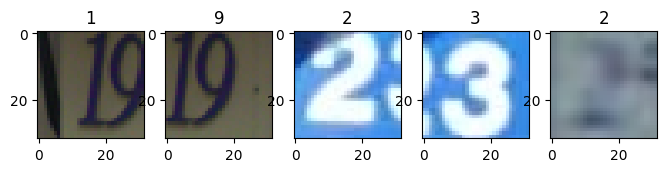

In [ ]:
figure = plt.figure(figsize=(8, 8))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  # imshow requires (32,32,3)
  plt.imshow(np.moveaxis(SVHN_data.data[i], 0, 2))
  plt.title(SVHN_data.labels[i])

In [ ]:
# DataLoader: get minibatches from dataset
from torch.utils.data import DataLoader

In [ ]:
# result will be an iterable
SVHN_dataloader = DataLoader(SVHN_data, batch_size=32, shuffle=True)

In [ ]:
SVHN_features, SVHN_labels = next(iter(SVHN_dataloader))

tensor(4)

In [ ]:
SVHN_features.shape

torch.Size([32, 3, 32, 32])

In [ ]:
SVHN_labels.shape

torch.Size([32])